# Diwali Sales Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\shiva\Downloads\Notes and books\docs\projects\tempdata\Python_Diwali_Sales_Analysis\Python_Diwali_Sales_Analysis\Diwali Sales Data.csv', encoding='unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status','unnamed1'],axis=1, inplace=True)

In [7]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(11239, 13)

In [10]:
df['Amount']=df['Amount'].astype('int')

In [11]:
df['Amount'].dtypes

dtype('int32')

**Exploratory data analysis**

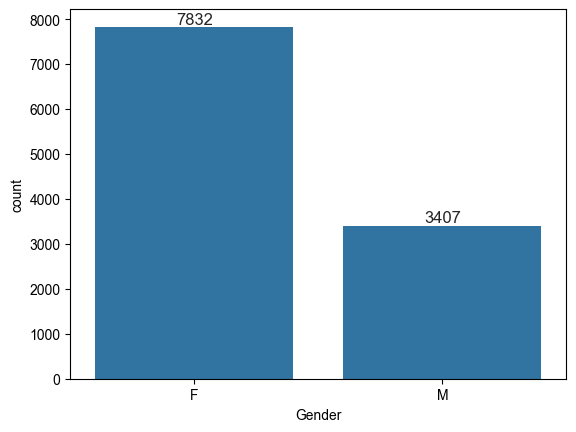

In [12]:
ax=sns.countplot(x='Gender',data=df)
sns.set(rc={'figure.figsize':(2,5)})
for bars in ax.containers:
    ax.bar_label(bars)
    

<Axes: xlabel='Gender', ylabel='Amount'>

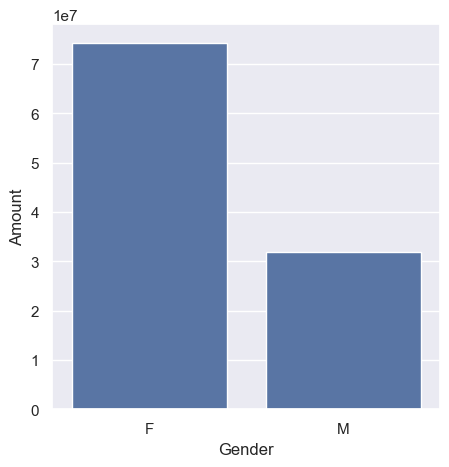

In [13]:
sales_gender=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x='Gender',y='Amount', data=sales_gender)


**From the above graphs the conclusion is most of the buyers are female and even the purchasing power of females are greater than men**

df.columns

**Age Group**

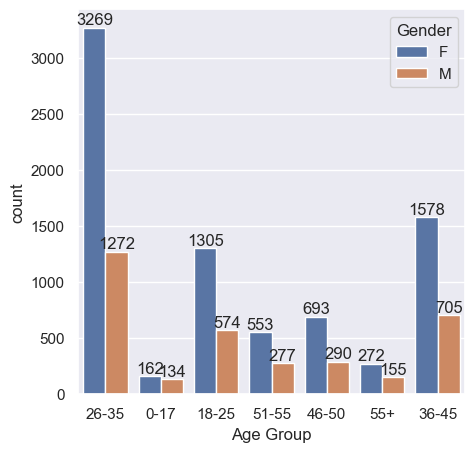

In [14]:
ax=sns.countplot(x='Age Group', hue='Gender',data= df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

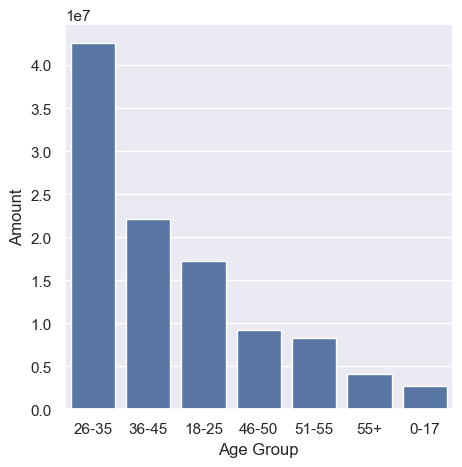

In [15]:
sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False)
sns.barplot(x='Age Group',y='Amount', data=sales_age)

**From the above graph we can see that the most of the buyers are 26-35 years females**

**State**

<Axes: xlabel='State', ylabel='Orders'>

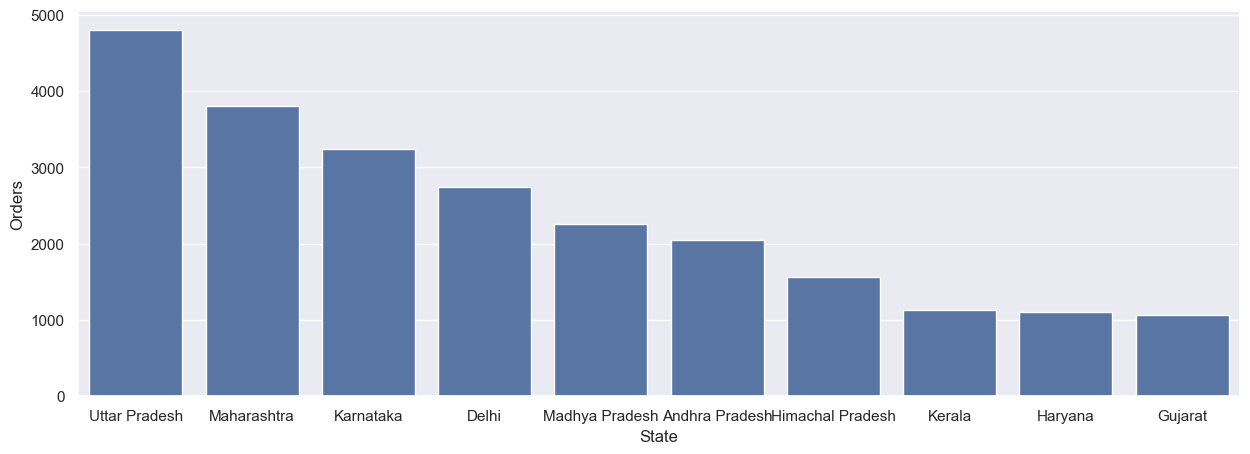

In [16]:
#TOTAL NO. OF THE ORDERS FROM THE TOP 10 STATES
sales_State=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by=['Orders'],ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Orders', data=sales_State)

**The above graph shows the top 10 states that made the most orders and among them, the top 3 states that made the most orders are Uttar Pradesh, Maharastra and Karnatka.**

<Axes: xlabel='State', ylabel='Amount'>

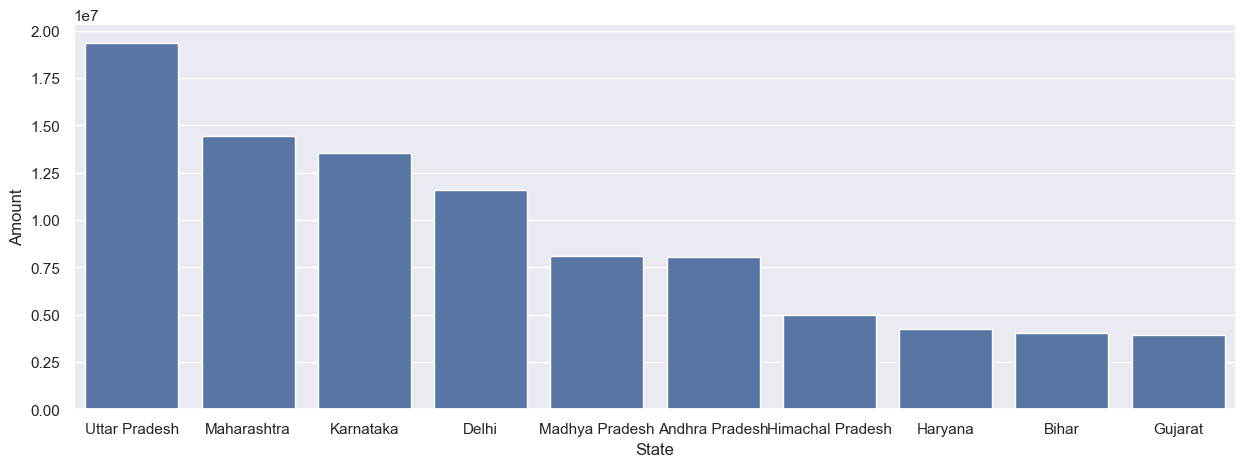

In [17]:
sales_State=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Amount', data=sales_State)

**The above graph shows the top 10 states that made the most amount and among them, the top 3 states that made the most amount are Uttar Pradesh, Maharastra and Karnatka.**

**Marital Status**

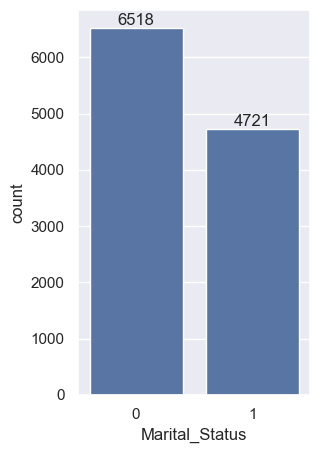

In [29]:
ax=sns.countplot(x='Marital_Status',data= df)
sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)
#where 0= married and 1=unmarried

<Axes: xlabel='Marital_Status', ylabel='Amount'>

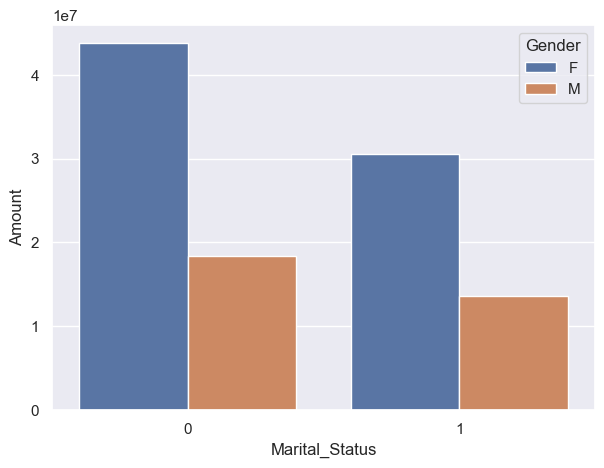

In [19]:
sales_ms=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False)
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(x='Marital_Status',y='Amount', hue='Gender', data=sales_ms)

**From the above graph we can see that most of the buyers are married(women) and their purchasing power is high.**

In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

**Occupation**

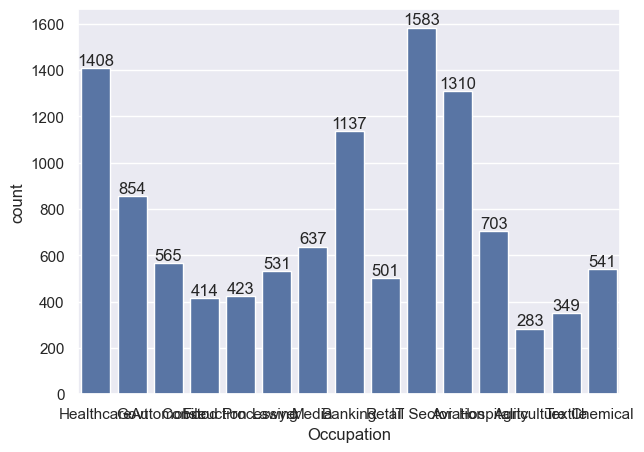

In [21]:
ax=sns.countplot(x='Occupation',data= df)
sns.set(rc={'figure.figsize':(21,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

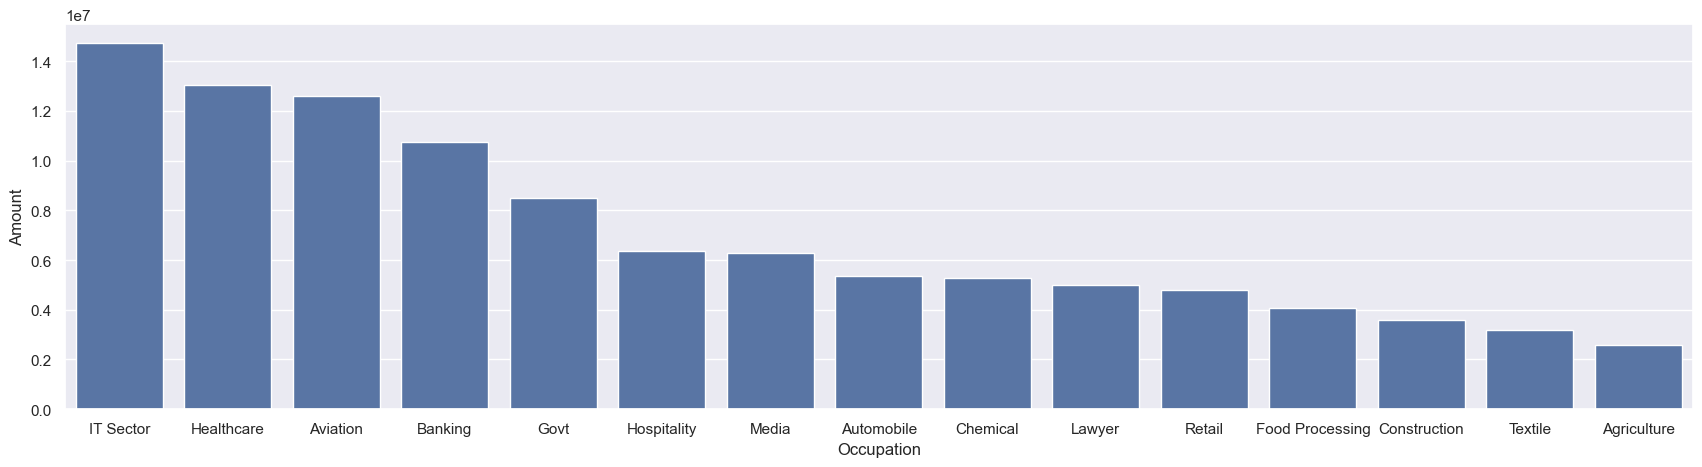

In [22]:
sales_oc=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False)
sns.set(rc={'figure.figsize':(21,5)})
sns.barplot(x='Occupation',y='Amount', data=sales_oc)

**From the above graph we can see that the sector with the highest purchasing power are IT, Healthcare and Aviation sector.**

**Product Category**

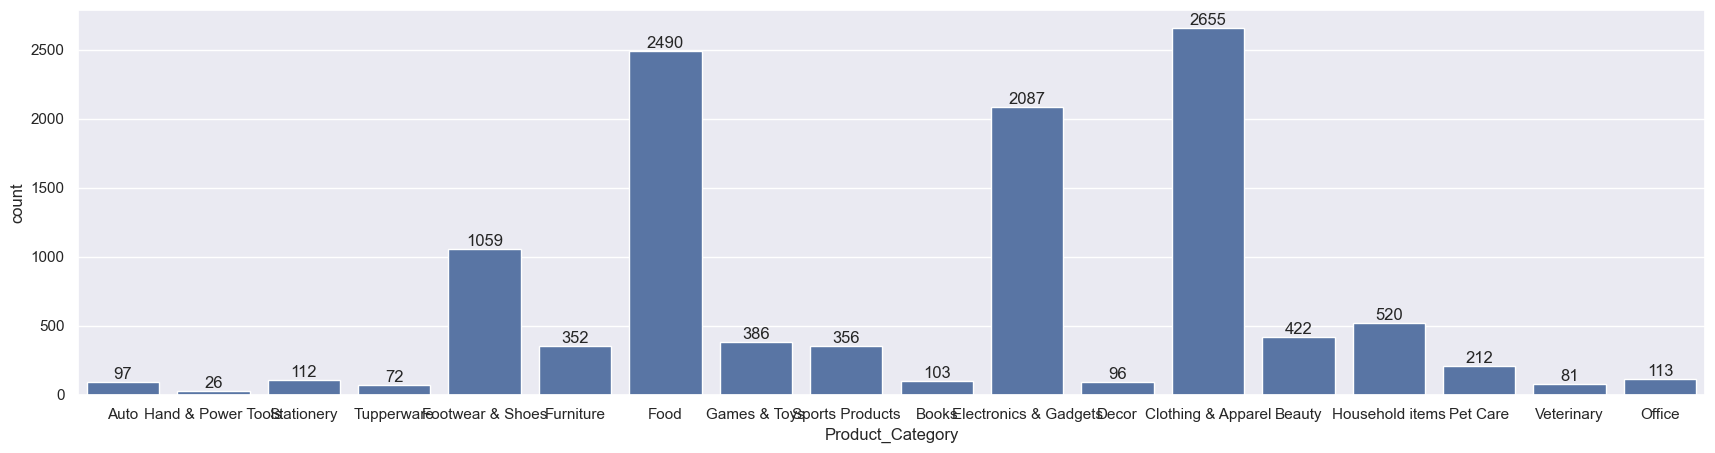

In [23]:
ax=sns.countplot(x='Product_Category',data= df)
sns.set(rc={'figure.figsize':(26,5)})
for bars in ax.containers:
    ax.bar_label(bars)

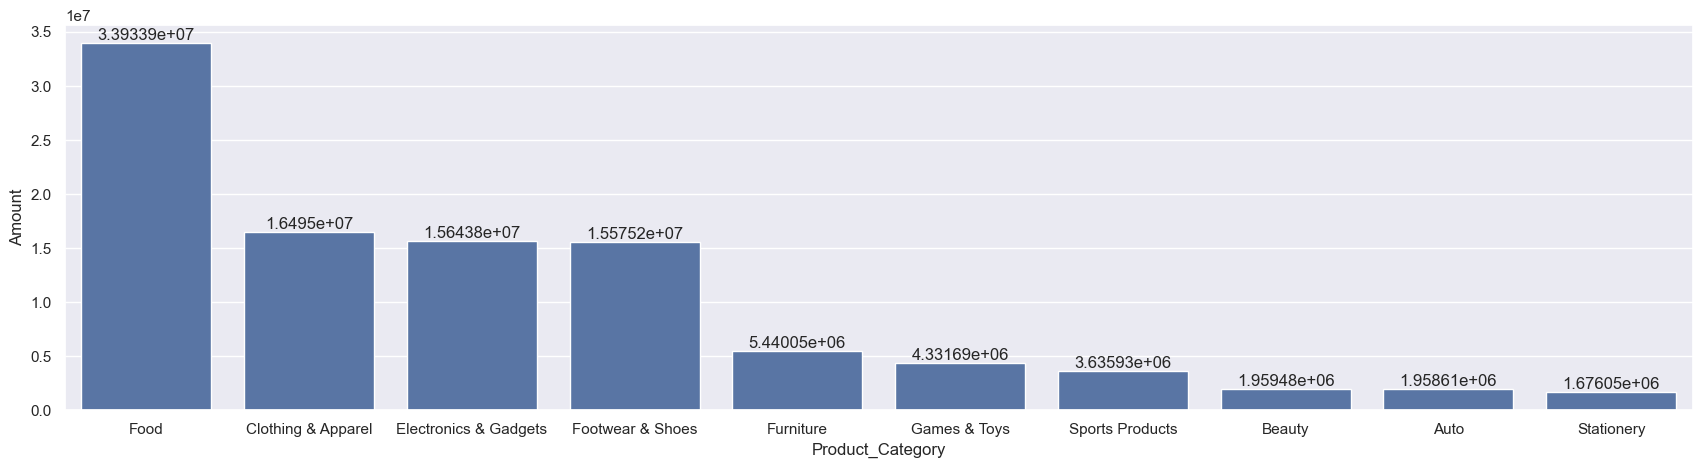

In [24]:
sales_pc=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False).head(10)
sns.set(rc={'figure.figsize':(21,5)})
ax=sns.barplot(x='Product_Category',y='Amount', data=sales_pc)
for bars in ax.containers:
    ax.bar_label(bars)

**From the above graph we can see that the most sold products are food, clothing and electronics items.**

**Product_ID**

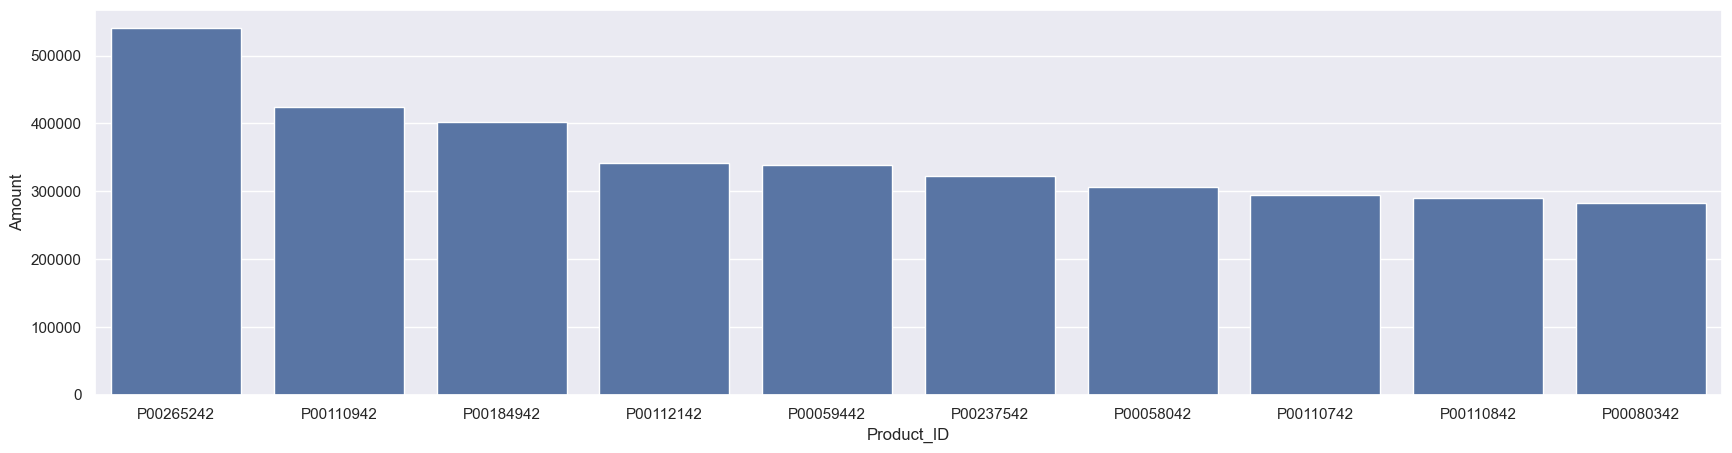

In [25]:
sales_pi=df.groupby(['Product_ID'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False).head(10)
sns.set(rc={'figure.figsize':(21,5)})
ax=sns.barplot(x='Product_ID',y='Amount', data=sales_pi)

**From the above graph we can see that the most sold products id which generated the most of the amount.**

# Conclusion

*Married women age group 26-35 yrs from Uttar Pradesh, Maharastra and Karnatka working in IT, Healthcare and Aviation sectors are most likely to buy products from the food, clothing and electronics items category.*